# <strong><font color=#A52A2A></span> MIR_HW4 </strong>

98101566 -> Mohammadreza Daviran
<br>
98105919 -> Reza Erfan Arani
<br>
98106434 -> Mohammad Khodadadi Aski
<br>

<strong><font color=#B22222></span> Please run this notebook on google colab! </strong>

# <strong><font color=#5F9EA0></span> Download the files </strong> 

In [1]:
import requests
import json

In [2]:
!git clone https://github.com/language-ml/course-nlp-ir-1-text-exploring.git

Cloning into 'course-nlp-ir-1-text-exploring'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 401 (delta 2), reused 0 (delta 0), pack-reused 397
Receiving objects: 100% (401/401), 98.78 MiB | 23.34 MiB/s, done.
Resolving deltas: 100% (197/197), done.
Checking out files: 100% (245/245), done.


In [3]:
%cd course-nlp-ir-1-text-exploring/exploring-datasets/health

/content/course-nlp-ir-1-text-exploring/exploring-datasets/health


In [4]:
ls

hidoctor-1.json  hidoctor-4.json  namnak-2.json  namnak-5.json
hidoctor-2.json  hidoctor-5.json  namnak-3.json  README.md
hidoctor-3.json  namnak-1.json    namnak-4.json


Our dataset is json so first of all we merge all the files to 'bio.json' file.

In [5]:
def merge_JsonFiles(filename):
    result = list()
    for f1 in filename:
        with open(f1, 'r') as infile:
            result.extend(json.load(infile))

    with open('bio.json', 'w') as output_file:
        json.dump(result, output_file)

# files = ['hidoctor-1.json', 'hidoctor-2.json', 'hidoctor-3.json','hidoctor-4.json','hidoctor-5.json', 'namnak-1.json', 'namnak-2.json', 'namnak-3.json','namnak-4.json','namnak-5.json']
files = ['namnak-1.json', 'namnak-2.json', 'namnak-3.json','namnak-4.json','namnak-5.json']
merge_JsonFiles(files)

By loading the json file, we extract all the paragraphs and save them in *documents* for future work.

In [6]:
f = open('bio.json')
bioset = json.load(f)
f.close()

In [7]:
documents = []
for i in bioset:
  documents.append(i['paragraphs'])

In [8]:
len(documents)

875

In [9]:
x = set()
for i in bioset:
  x.add(i['categories'][1])
NUM_OF_CATEGORIES = len(x)

In [10]:
print(len(bioset))
print(NUM_OF_CATEGORIES)

875
7


In [11]:
bioset[500]['categories'][1]

'سلامت خانواده'

# <strong><font color=#5F9EA0></span> Preprocessing </strong> 

First we import the requirements for preprocessing the data.

In [12]:
import random 
import tqdm
import nltk
from nltk.corpus import brown
from nltk import word_tokenize
import csv
import re
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random 
import nltk
import codecs

In [13]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 15.6 MB/s 
     |████████████████████████████████| 233 kB 41.4 MB/s 
     |████████████████████████████████| 1.4 MB 13.9 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=340e16e85ecc3aadc4ca6979624236589d79b3ba15e6356f02ddd65f118a186d
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154943 sha256=2a32a420ef7b3ad755e51726d3c1c166d56e0b47713456df70eb33bb234aef2b
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [14]:
from __future__ import unicode_literals
from hazm import *

**normalize**

normalizer function normilizes the docs we extracted and saves them 



In [15]:
normalizer = Normalizer()

doc_normalized = [[normalizer.normalize(y) for y in x] for x in tqdm.tqdm(documents)]

100%|██████████| 875/875 [00:03<00:00, 247.23it/s]


In [16]:
doc_normalized_edited = []
for doc in doc_normalized:
  temp = []
  for x in doc:
    temp.append(x.replace('\u200c', ' '))
  doc_normalized_edited.append(temp)

**wording**

here we tokenize the sentences in each normilized document and then we save them in the doc_sentences array 

In [17]:
doc_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(doc_normalized_edited)]

100%|██████████| 875/875 [00:00<00:00, 4288.01it/s]


**tokenize**

we tokenize the words in the doc_sentences array and the we save them into doc_tokens array by tqdm tools.

In [18]:
doc_tokens = [[word_tokenize(sent) for sent in sents] for sents in tqdm.tqdm(doc_sentences)]

100%|██████████| 875/875 [00:01<00:00, 484.08it/s]


Then by using itertools save them in all_tokens. Because we want to exclude the stopwords from our tokens.

In [19]:
all_tokens = []
for i in doc_tokens:
  all_tokens.append(list(itertools.chain.from_iterable(i)))

**Delete stop words**

here we 


1.   download the persian stopwords from bellow link
2.   then we delete them from all_tokens arraylist cause they have no value for us
3. save the tokens which are not stopwords in all_tokens_nonstop arraylist




In [20]:
import codecs
link = "https://raw.githubusercontent.com/sobhe/hazm/master/hazm/data/stopwords.dat"
temp_file = open('stopwords.txt', 'wb').write(requests.get(link, allow_redirects=True).content)

In [21]:
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('stopwords.txt','r','utf-8').readlines()]

In [22]:
all_tokens_nonstop = []
for doc in all_tokens:
  all_tokens_nonstop.append([t for t in tqdm.tqdm(doc) if t not in stopwords])

100%|██████████| 751/751 [00:00<00:00, 49570.73it/s]


**lemmatization, stemming**

here we lemmatize and stem the tokens 

In [23]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt == 1:
        return stemmer.stem(tok)
    if opt == 2:
        return lemmatizer.lemmatize(tok)

In [24]:
opt = 2

all_tokens_nonstop_lemstem = []

for doc in all_tokens_nonstop:
  all_tokens_nonstop_lemstem.append([get_lemma_set(t, opt) for t in tqdm.tqdm(doc)])

100%|██████████| 465/465 [00:00<00:00, 209625.04it/s]


# <strong><font color=#5F9EA0></span> tf-idf </strong> 

Download all the requirements especially TfidfVectorizer from sklearn.

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

We use TfidfVectorizer with (1, 1) ngram and l2 norm for our vectorizer.
Then we find all the documents' vectors with fit_transform.

In [27]:
# vectorizer = TfidfVectorizer(use_idf = True, norm ='l2', ngram_range=(1,2), analyzer='word')
vectorizer = TfidfVectorizer(use_idf = True, norm ='l2', ngram_range=(1,1))
doc_term_mat = vectorizer.fit_transform([' '.join(doc) for doc in all_tokens_nonstop_lemstem])
vocabulary = vectorizer.get_feature_names_out()


In [28]:
doc_term_mat[0].shape

(1, 16297)

# <strong><font color=#5F9EA0></span> Clustering </strong> 

Download all the requirements especially KMeans from sklearn.

In [29]:
from sklearn.cluster import KMeans
import numpy as np

First we want to define what is the best number for n_clusters. There are different methods for that, so we use a few of them.

## <strong><font color=#8FBC8F></span> Finding the number of clusters </strong> 

First method is **Elbow Method** for optimal value of k in KMeans.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

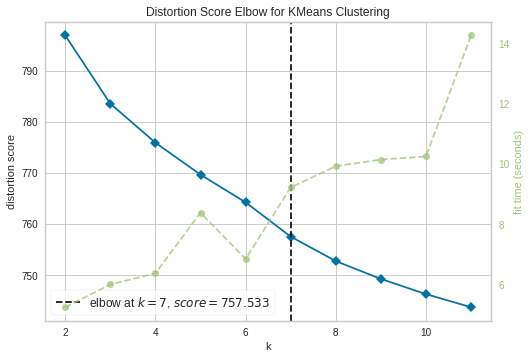

In [ ]:
# X = np.array(doc_term_mat)
X = doc_term_mat.toarray()

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)
visualizer.show() 

we can see that the optimal value of k in KMeans according to the Elbow method is 7. 

Also we examine this answer with the categorization of namnak which is the correct answer!

In [ ]:
x = set()
for i in bioset:
  x.add(i['categories'][1])
NUM_OF_CATEGORIES = len(x)

In [ ]:
print("The optimal k in KMeans for Namnak dataset is {}.".format(NUM_OF_CATEGORIES))

The optimal k in KMeans for Namnak dataset is 7.


So we use number 7 as k for KMeans. 

## <strong><font color=#8FBC8F></span> Visualization </strong> 

Cluster visualization renders cluster data as an interactive map. 
<br>
This will allow us to see a quick overview of our cluster sets and quickly drill into each cluster set to view subclusters and conceptually-related clusters.

First, we have to find the correct labels for the dataset to visualize both of them so we can compare them.

In [30]:
categories = set()
true_labels = []
for i in bioset:
  categories.add(i['categories'][1])
dic = {}
counter = 0
for category in categories:
  dic[category] = counter
  counter += 1
true_labels = []
for i in bioset:
  category = i['categories'][1]
  true_labels.append(dic[category])
true_labels = np.array(true_labels)
true_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

To visualize the clusters we can use some of the most popular methods for dimensionality reduction, namely <strong><font color=#c69bf5>PCA</font></strong> and <strong><font color=#c69bf5>t-SNE</font></strong>.

### <strong><font color=#DAA520></span> PCA </strong> 

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(doc_term_mat.toarray())

we use KMeans method to cluster the data to 7 different clusters.

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(doc_term_mat)
predicted_labels = kmeans.labels_

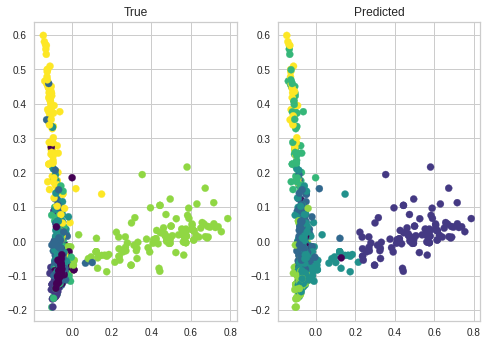

In [ ]:
#plot 1:
plt.subplot(1, 2, 1)
plt.scatter(principalComponents[:,0], principalComponents[:,1],  c=true_labels, s=50, cmap='viridis')
plt.title("True")
plt.rcParams["figure.figsize"] = (30,6)

#plot 2:
plt.subplot(1, 2, 2)
plt.scatter(principalComponents[:,0], principalComponents[:,1],  c=predicted_labels, s=50, cmap='viridis')
plt.title("Predicted")
plt.rcParams["figure.figsize"] = (30,6)


plt.show()

We can see that these two plots are very similar in data clustering. So we can say that our KMeans model performs perfectly.

### <strong><font color=#DAA520></span> t-SNE </strong> 

t-SNE ( t-Distributed Stochastic Neighbor Embedding) is a technique that visualizes high dimensional data by giving each point a location in a two or three-dimensional map. The technique is the Stochastic Neighbor Embedding (SNE) variation that is much easier to optimize and produces significantly better visualization.

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(doc_term_mat.toarray())
X_embedded.shape

(875, 2)

we use KMeans method to cluster the data to 7 different clusters. 

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(doc_term_mat)
y = kmeans.labels_

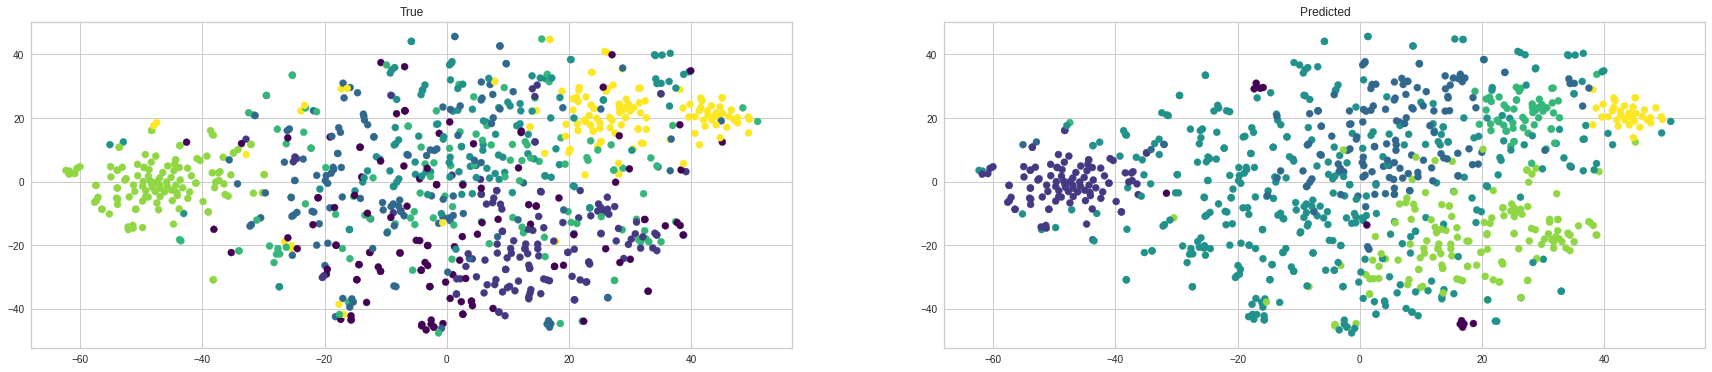

In [ ]:
#plot 1:
plt.subplot(1, 2, 1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=true_labels, s=50, cmap='viridis')
plt.title("True")
plt.rcParams["figure.figsize"] = (15,6)

#plot 2:
plt.subplot(1, 2, 2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=50, cmap='viridis')
plt.title("Predicted")
plt.rcParams["figure.figsize"] = (15,6)


plt.show()


These two plots are similar to each other with good approximation, which shows the efficiency and correctness of our method.

## <strong><font color=#8FBC8F></span> Evaluation </strong> 

After visualization, we have to evaluate our model. To evaluate the clusters we can use some of the most popular methods for evaluating clustering, so we use **three** different methods, namely <strong><font color=#c69bf5>RSS</font></strong>, <strong><font color=#c69bf5>silhoutte score</font></strong>, and <strong><font color=#c69bf5>purity score</font></strong>.

### <strong><font color=#DAA520></span> RSS evaluation </strong> 

We use RSS evaluation for our method:

In [ ]:
def calculate_RSS(docs, centers, labels):
  RSS = 0
  for i in range(len(documents)):
    RSS += np.sum(np.square(docs[i] - centers[labels[i]]))
  return RSS

We know that The lower the RSS value, means the better clustering method!

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(doc_term_mat)
RSS = calculate_RSS(doc_term_mat, kmeans.cluster_centers_, kmeans.labels_)
print("RSS is {}".format(RSS))

RSS is 759.411570228069


We can use different random_state for KMeans.

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(doc_term_mat)
for i in range(5):
  kmeans = KMeans(n_clusters=7, random_state=i).fit(doc_term_mat)
  RSS = calculate_RSS(doc_term_mat, kmeans.cluster_centers_, kmeans.labels_)
  print("For random_state={}, RSS is {}".format(i, RSS))

For random_state=0, RSS is 759.411570228069
For random_state=1, RSS is 758.3734765012664
For random_state=2, RSS is 759.8578614384147
For random_state=3, RSS is 756.7320964936961
For random_state=4, RSS is 756.4786773361566


But we can see that The scores obtained are not much different, so we still use random_state = 0.

### <strong><font color=#DAA520></span> silhouette score </strong> 

We import silhouette_score from sklearn.metrics to evaluate our method with silhouette score.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_avg = silhouette_score(doc_term_mat, kmeans.labels_)
print("For n_clusters =", 7, "The average silhouette_score is :",silhouette_avg,)

For n_clusters = 7 The average silhouette_score is : 0.03286448233912535


Even we can find *k* using Silhouette Coefficient and choose the *k* with the highest score.

In [ ]:
maximum = 0
arg_max = 0
for n_cluster in range(2, 13):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(doc_term_mat)
    label = kmeans.labels_
    sil_coeff = silhouette_score(doc_term_mat, label, metric='euclidean')
    if sil_coeff > maximum:
      maximum = sil_coeff
      arg_max = n_cluster
    print("For n_clusters = " + str(n_cluster) + ", The Silhouette Coefficient is " + str(sil_coeff))
print("\n So the optimal k is " + str(arg_max) + " with The Silhouette Coefficient of " + str(maximum))

For n_clusters = 2, The Silhouette Coefficient is 0.02351863301883477
For n_clusters = 3, The Silhouette Coefficient is 0.02765042529375547
For n_clusters = 4, The Silhouette Coefficient is 0.028009931064666076
For n_clusters = 5, The Silhouette Coefficient is 0.03161223615076194
For n_clusters = 6, The Silhouette Coefficient is 0.032069108158238754
For n_clusters = 7, The Silhouette Coefficient is 0.0317304549395302
For n_clusters = 8, The Silhouette Coefficient is 0.03501275202896522
For n_clusters = 9, The Silhouette Coefficient is 0.03762534359430442
For n_clusters = 10, The Silhouette Coefficient is 0.03962235874265236
For n_clusters = 11, The Silhouette Coefficient is 0.037214577206305346
For n_clusters = 12, The Silhouette Coefficient is 0.03307936890106089

 So the optimal k is 10 with The Silhouette Coefficient of 0.03962235874265236


### <strong><font color=#DAA520></span> Silhouette visualizer </strong> 

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

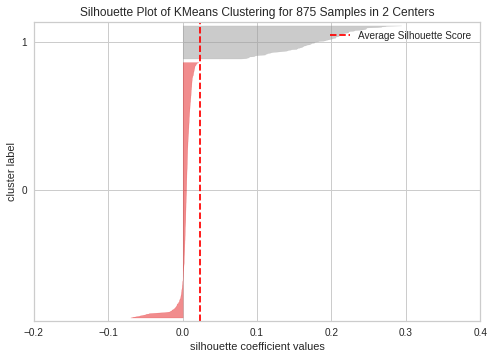

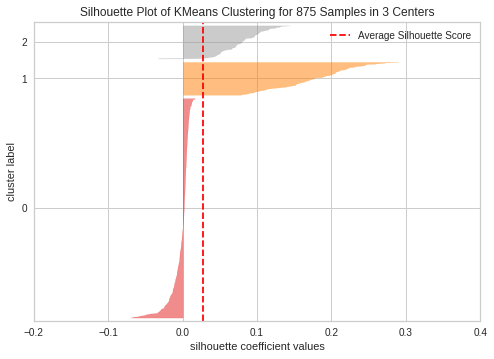

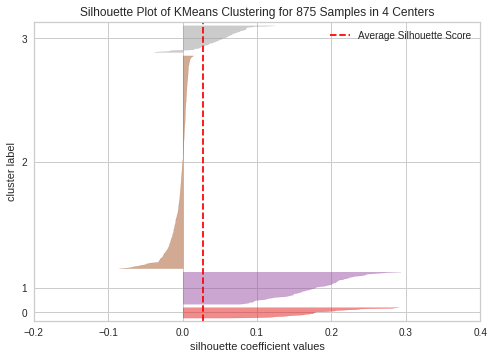

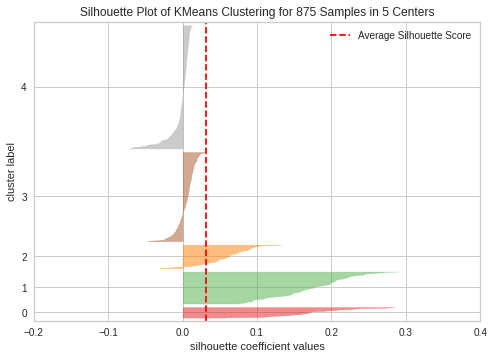

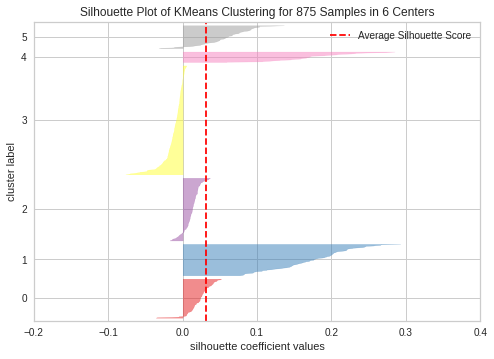

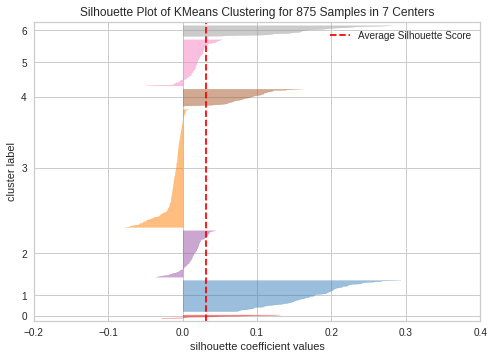

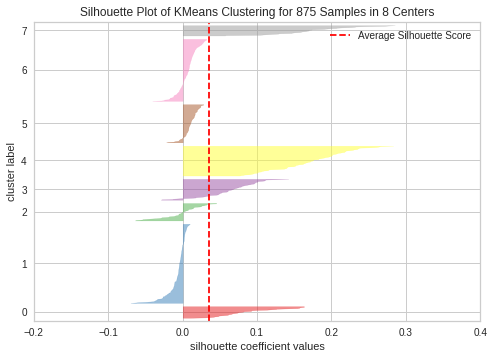

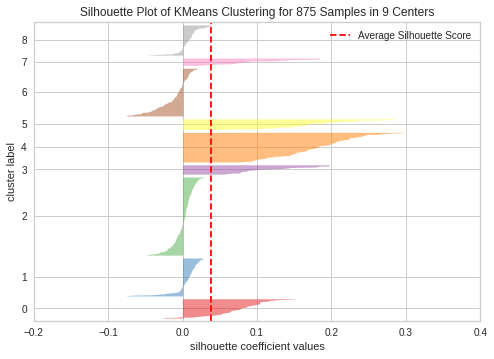

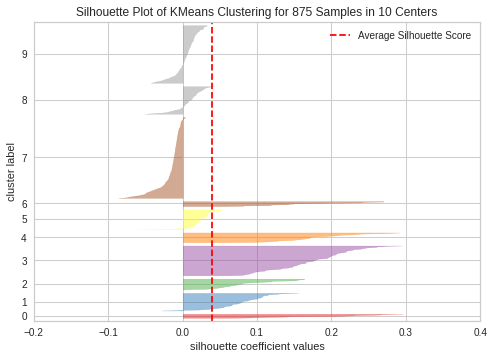

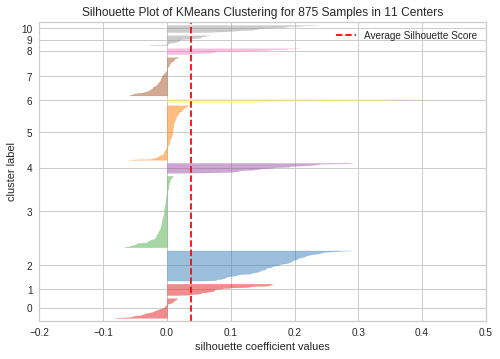

In [34]:
x = doc_term_mat.toarray()
for i in range(2,12):
  model = KMeans(i, random_state=0)
  visualizer = SilhouetteVisualizer(model)
  visualizer.fit(x)   
  visualizer.show() 

highest average silhouette score means better k

### <strong><font color=#DAA520></span> Intercluster Distance Maps </strong> 

In [35]:
from yellowbrick.cluster import InterclusterDistance

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center.



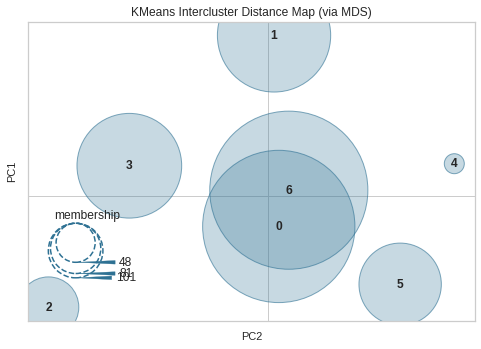

In [37]:
k = 7
x = doc_term_mat.toarray()
model = KMeans(k)
visualizer = InterclusterDistance(model, random_state=0).fit(x)       
visualizer.show()


### <strong><font color=#DAA520></span> Purity score </strong> 

Import the requierments

In [ ]:
from sklearn.metrics import accuracy_score

For evaluating purity score we first want to find the correct labels for the dataset.

In [ ]:
categories = set()
true_labels = []
for i in bioset:
  categories.add(i['categories'][1])
dic = {}
counter = 0
for category in categories:
  dic[category] = counter
  counter += 1
true_labels = []
for i in bioset:
  category = i['categories'][1]
  true_labels.append(dic[category])
true_labels = np.array(true_labels)
true_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,

Then we define purity_score and evaluate our model.

In [ ]:
def purity_score(true_labels, predicted_labels):
    arr = np.zeros(true_labels.shape)

    labels = np.unique(true_labels)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        true_labels[true_labels==labels[k]] = ordered_labels[k]

    labels = np.unique(true_labels)
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(predicted_labels):
        winner = np.argmax( np.histogram(true_labels[predicted_labels==cluster], bins=bins)[0])
        arr[predicted_labels==cluster] = winner

    return accuracy_score(true_labels, arr)

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(doc_term_mat)

In [ ]:
purity_score(true_labels, kmeans.labels_)

0.496

## <strong><font color=#8FBC8F></span> Prediction </strong> 

In [36]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(doc_term_mat)
predicted_labels = kmeans.labels_

In [48]:
def process_query(query):
    splitted_input = query.split(" ")
    nsi = []
    for x in splitted_input:
        if x not in stopwords:
            nsi.append([normalizer.normalize(lemmatizer.lemmatize(x))])
    return nsi


def find_query_vector(tokens):
    vector = np.zeros(len(vocabulary))
    for token in itertools.chain(*tokens):
        try:
            index = vectorizer.vocabulary_[token]
            vector[index] = 1
        except ValueError:
            pass
    return vector

In [49]:
query = 'تپش قلب'
query_vector = find_query_vector(process_query(query))

In [58]:
from scipy import sparse

query_vector = sparse.csr_matrix(query_vector)

In [57]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=7, n_iter=7, random_state=42)

x_dr = svd.fit_transform(doc_term_mat)
y = kmeans.fit_predict(x_dr)  

x_dr = svd.transform(query_vector)
y = kmeans.predict(x_dr)

print('Cluster number: ', y[0])

1


## <strong><font color=#8FBC8F></span> Explanations </strong> 

<strong>Pre-processing has given clustering many advantages:</strong> 


*   Better and faster performances
*   Removing step-words and lematizing is also make the better.


After pre-processing we found kmeans, checked various evaluations and observe that our way is doing very good in clustering. 

Then we Visualize them and compare them with original labels visualization and we saw that they look very similar. 
<br>This means that the work is done correctly!😃

# <strong><font color=#5F9EA0></span> Classification </strong> 

In this project, we want to classify tweets into positive and negative sentiment using two methods. First, we will use a regression model to predict the sentiment of a tweet. Second, we will use an transformer-based model. Steps of the process are:
- Load the data
- Preprocess the data
  - Tokenize the data
  - Normalize the data
  - Stem the data
  - Rejoin the tokens
- Fit a regression model
  - Vectorize the data
  - Split the data into training and test sets
  - Train the model
  - Evaluate the model
- Fit a transformer-based model
  - Split the data into training and test sets
  - Train the model
  - Evaluate the model

---

In [ ]:
!pip install simpletransformers
from simpletransformers.classification import ClassificationModel

In [30]:
import pandas as pd
import nltk
import string
import functools
import numpy as np
import sklearn as sk
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from scipy import sparse

## <strong><font color=#8FBC8F></span> Finding true labels </strong> 

Here we used sklearn package in order to vectorize the tweet text, and fit a regression model with it. 

---

In [37]:
categories = set()
for i in bioset:
  categories.add(i['categories'][1])
dic = {}
counter = 0
for category in categories:
  dic[category] = counter
  counter += 1
true_labels = []
for i in bioset:
  category = i['categories'][1]
  true_labels.append(dic[category])
true_labels = np.array(true_labels)

## <strong><font color=#8FBC8F></span> Regression Model </strong> 

Here we used sklearn package in order to vectorize the tweet text, and fit a regression model with it. 

---

In [34]:
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(doc_term_mat, true_labels, test_size=TEST_SIZE)

In [35]:
logistic_regression = sk.linear_model.LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

### <strong><font color=#DAA520></span> Test model </strong> 

In [36]:
logistic_regression.score(X_test, y_test)

0.6971428571428572

In [37]:
y_pred = logistic_regression.predict(X_test)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred, average="macro"))
print("precision score: ", precision_score(y_test, y_pred, average="macro"))
print("recall score: ", recall_score(y_test, y_pred, average="macro"))

confusion matrix: 
 [[16  0  3  0  1  0  7]
 [ 0 22  2  0  0  3  3]
 [ 2  0 12  1  2  4  3]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0 21  1  1]
 [ 4  2  0  0  0 21  3]
 [ 1  2  2  0  2  4 11]]
accuracy score:  0.6971428571428572
f1 score:  0.7031460455380721
precision score:  0.7086140077640569
recall score:  0.7055670577409707


### <strong><font color=#DAA520></span> Prediction </strong> 

In [38]:
def process_query(query):
    splitted_input = query.split(" ")
    nsi = []
    for x in splitted_input:
        if x not in stopwords:
            nsi.append([normalizer.normalize(lemmatizer.lemmatize(x))])
    return nsi


def find_query_vector(tokens):
    vector = np.zeros(len(vocabulary))
    for token in itertools.chain(*tokens):
        try:
            index = vectorizer.vocabulary_[token]
            vector[index] = 1
        except ValueError:
            pass
    return vector

def get_category(index):
    return dict(zip(dic.values(), dic.keys()))[index]

In [42]:
query = 'تپش قلب'
query_vector = find_query_vector(process_query(query))
query_vector = sparse.csr_matrix(query_vector)
query_class = logistic_regression.predict(query_vector)

print(get_category(query_class[0]))

تازه های سلامت


## <strong><font color=#8FBC8F></span> Transformer Based Model </strong> 

Here we used simpletransformer package in addition to sklearn package.


In [31]:
!pip install transformers torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 24.5 MB/s 
     |████████████████████████████████| 6.6 MB 45.9 MB/s 
     |████████████████████████████████| 596 kB 68.0 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [32]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, TFAutoModel, BigBirdModel
import torch

In [33]:
import pickle

from transformers import AutoModelForSequenceClassification, AutoTokenizer

Check if gpu is available or not:

In [34]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

There are not many Persian models for Transformers. 

For this reason, we use one of the two models, **Parsbert** or **ParsBigBird**.

In [35]:
choice = 2

if choice == 1:
  model_name_or_path = "HooshvareLab/bert-fa-zwnj-base"
  config = AutoConfig.from_pretrained(model_name_or_path)
  tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

  # model = TFAutoModel.from_pretrained(model_name_or_path).to(device)
  model = AutoModel.from_pretrained(model_name_or_path).to(device)

if choice == 2:

  MODEL_NAME = "SajjadAyoubi/distil-bigbird-fa-zwnj"

  # model = BigBirdModel.from_pretrained(MODEL_NAME, block_size=32).to(device)
  model = BigBirdModel.from_pretrained(MODEL_NAME, attention_type="original_full").to(device)
  tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

print(model.device)

Downloading:   0%|          | 0.00/837 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/300M [00:00<?, ?B/s]

Some weights of the model checkpoint at SajjadAyoubi/distil-bigbird-fa-zwnj were not used when initializing BigBirdModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BigBirdModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdModel were not initialized from the model checkpoint at SajjadAyoubi/distil-bigbird-fa-zwnj and are newly initialized: ['bert.pooler.

Downloading:   0%|          | 0.00/365 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

cpu


In [38]:
TEST_SIZE = 0.2
X_train, X_testval, y_train, y_testval = sk.model_selection.train_test_split(all_tokens_nonstop_lemstem[0:500], true_labels[0:500], test_size=TEST_SIZE, random_state=1)
# X_train, X_testval, y_train, y_testval = sk.model_selection.train_test_split(all_tokens_nonstop_lemstem[0:500], true_labels[0:500], test_size=TEST_SIZE, random_state=1)
X_val, X_test, y_val, y_test = sk.model_selection.train_test_split(X_testval, y_testval, test_size=0.5, random_state=1)

In [39]:
train_encodings = tokenizer([''.join(x) for x in X_train], truncation=True, padding=True)
val_encodings = tokenizer([''.join(x) for x in X_val], truncation=True, padding=True)
test_encodings = tokenizer([''.join(x) for x in X_test], truncation=True, padding=True)

In [40]:
import torch

class HealthDataset(torch.utils.data.Dataset):

  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

train_dataset = HealthDataset(train_encodings, y_train)
val_dataset = HealthDataset(val_encodings, y_val)
test_dataset = HealthDataset(test_encodings, y_test)

In [41]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

c1_model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=7)

Some weights of the model checkpoint at SajjadAyoubi/distil-bigbird-fa-zwnj were not used when initializing BigBirdForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint 

In [42]:
from transformers import  Trainer, TrainingArguments

training_args = TrainingArguments(
  output_dir='./results',
  num_train_epochs=5,
  per_device_train_batch_size=10,
  per_device_eval_batch_size=8,
  warmup_steps=500,
  weight_decay=0.01,
  logging_dir='./logs',
  logging_steps=10,
  )

trainer = Trainer(
  model=c1_model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=val_dataset
  )

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 400
  Num Epochs = 10
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 400
/usr/local/lib/python3.7/dist-packages/transformers/models/big_bird/modeling_big_bird.py:983: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a,

Step,Training Loss
10,1.961600
20,1.942800
30,1.927500
40,1.925900
50,1.913300
60,1.911800
70,1.873800
80,1.842200
90,1.798500
100,1.731700




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=400, training_loss=0.951138012483716, metrics={'train_runtime': 14305.5441, 'train_samples_per_second': 0.28, 'train_steps_per_second': 0.028, 'total_flos': 537174036480000.0, 'train_loss': 0.951138012483716, 'epoch': 10.0})

In [43]:
from transformers import pipeline
generator = pipeline('text-classification', c1_model, tokenizer=tokenizer, config={'max_length':256})

In [46]:
generated = generator([''.join(x) for x in X_test])

In [47]:
generated

[{'label': 'LABEL_6', 'score': 0.9876339435577393},
 {'label': 'LABEL_5', 'score': 0.3560962975025177},
 {'label': 'LABEL_6', 'score': 0.9931110143661499},
 {'label': 'LABEL_4', 'score': 0.9962345957756042},
 {'label': 'LABEL_3', 'score': 0.9929144382476807},
 {'label': 'LABEL_4', 'score': 0.9980300068855286},
 {'label': 'LABEL_4', 'score': 0.9952573180198669},
 {'label': 'LABEL_0', 'score': 0.917997419834137},
 {'label': 'LABEL_5', 'score': 0.870420515537262},
 {'label': 'LABEL_6', 'score': 0.9901371002197266},
 {'label': 'LABEL_6', 'score': 0.9232974648475647},
 {'label': 'LABEL_3', 'score': 0.7601713538169861},
 {'label': 'LABEL_4', 'score': 0.7506015300750732},
 {'label': 'LABEL_3', 'score': 0.9945498108863831},
 {'label': 'LABEL_2', 'score': 0.9943574070930481},
 {'label': 'LABEL_2', 'score': 0.9953504800796509},
 {'label': 'LABEL_5', 'score': 0.9815376996994019},
 {'label': 'LABEL_1', 'score': 0.6605945825576782},
 {'label': 'LABEL_6', 'score': 0.979691207408905},
 {'label': 'LAB

In [56]:
y_pred = [int(y['label'].split('_')[1]) for y in generated]

### <strong><font color=#DAA520></span> Test model </strong> 

In [57]:
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred, average="macro"))
print("precision score: ", precision_score(y_test, y_pred, average="macro"))
print("recall score: ", recall_score(y_test, y_pred, average="macro"))

confusion matrix: 
 [[0 1 1 1 0 2 2]
 [1 4 0 1 0 1 1]
 [0 0 5 0 0 0 0]
 [1 0 0 5 0 0 1]
 [0 0 0 0 5 0 0]
 [0 3 1 1 1 3 0]
 [1 0 0 0 0 0 8]]
accuracy score:  0.6
f1 score:  0.5815708101422388
precision score:  0.548469387755102
recall score:  0.6337868480725624
